**Ventas de Consolas en la Historia**

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import datetime as dt 
import scienceplots
plt.style.use(['science', 'notebook','grid'])
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import requests
from bs4 import BeautifulSoup


# _Este dataframe se trata de las ventas de consolas de videojuegos a nivel mundial (dataframe sacado de kaggle.com), donde en sus columnas esta "Console Name", "Type":tipo de consola, "Company", "Released Year":año de lanzamiento, "Discontinuation Year": año que se dejó de vender, "Units sold (millon)": unidades vendidas por millon y "Remarks._  

In [140]:
df_con=pd.read_csv("consoles.csv")
df_con

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN
5,PlayStation 4,Home,Sony,2013,0,117.20,NaN
6,PlayStation,Home,Sony,1994,2006,102.49,NaN
7,Wii,Home,Nintendo,2006,2013,101.63,NaN
8,PlayStation 3,Home,Sony,2006,2017,87.40,Final sales are greater than 87.4 million
9,Xbox 360,Home,Microsoft,2005,2016,84.00,Final sales are greater than 84 million


_realizamos las estadísticas descriptivas_

In [141]:
df_con.describe()

,Released Year,Discontinuation Year,Units sold (million)
count,51.000000,51.000000,51.000000
mean,1996.058824,1844.803922,36.396471
std,12.378064,543.657319,42.692449
min,1976.000000,0.000000,1.000000
25%,1987.500000,1992.000000,3.200000
50%,1994.000000,1998.000000,13.560000
75%,2004.500000,2011.500000,61.805000
max,2020.000000,2020.000000,155.000000


In [142]:
print(df_con["Units sold (million)"].sum()) #total de unidades vendidas

1856.22


In [143]:
print(df_con["Units sold (million)"].mean()) #promedio de ventas

36.396470588235296


In [144]:
print(df_con["Units sold (million)"].mode()) #la moda de las ventas

0    1.0
Name: Units sold (million), dtype: float64


## _Acá generamos un gráfico de ventas de consolas por plataforma, la consola más vendida es PlayStation 2_

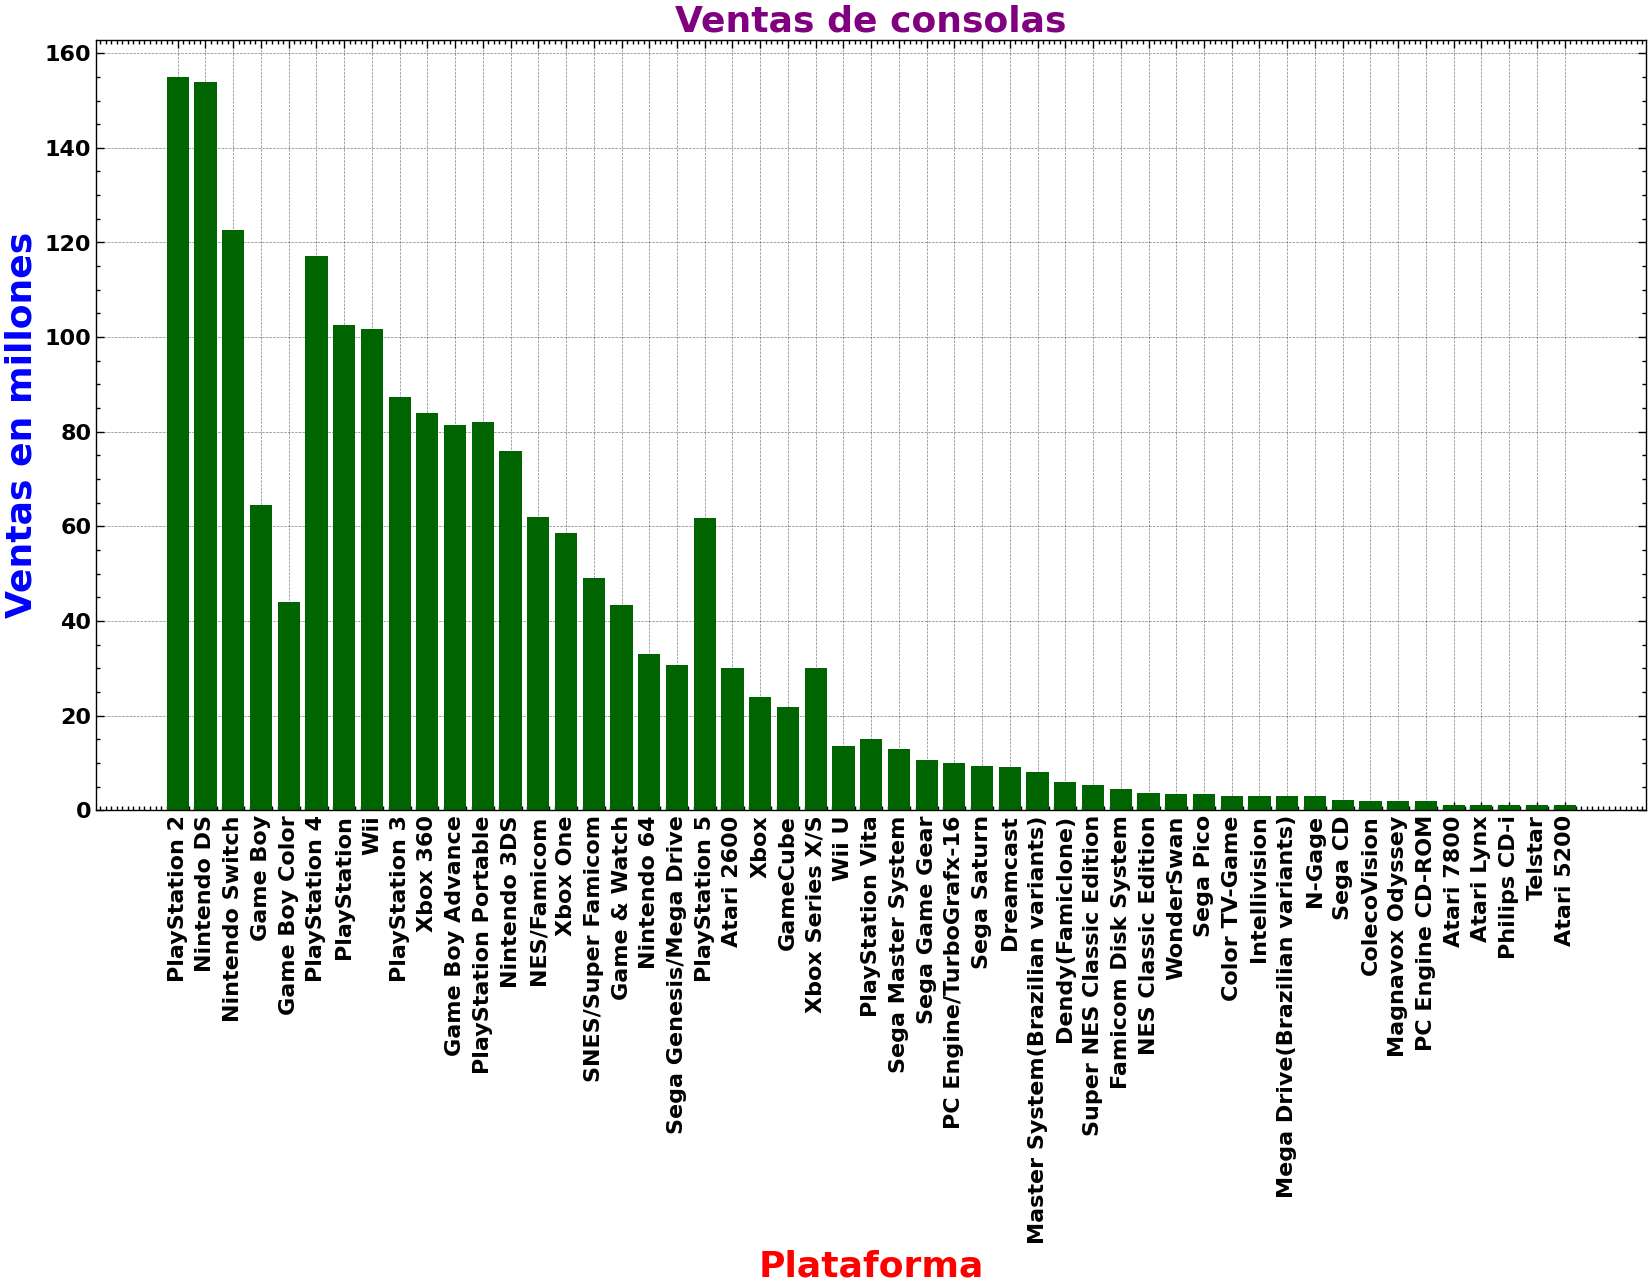

In [145]:
plt.figure(figsize=(20,10))
plt.bar(df_con["Console Name"], df_con["Units sold (million)"], color='darkgreen')
plt.xticks(ticks=df_con["Console Name"], rotation=90, color='black', fontweight='bold')
plt.yticks(color='black', fontweight='bold')
plt.xlabel('Plataforma', color='r', fontsize=26, fontweight='bold')
plt.ylabel("Ventas en millones", color='b',fontsize=26, fontweight='bold')
plt.title("Ventas de consolas", color='purple',fontsize=26, fontweight='bold')
plt.show()

## _Generación de Matriz de Correlación_

In [146]:
# Paso 1: Asegurar columnas numéricas
numeric_columns = df_con.select_dtypes(include=['number'])

# Paso 2: Manejar valores nulos
numeric_columns = numeric_columns.dropna()  # O reemplaza con .fillna(0)

# Paso 3: Eliminar columnas sin variabilidad
numeric_columns = numeric_columns.loc[:, numeric_columns.std() > 0]

# Paso 4: Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

print(correlation_matrix)


                      Released Year  Discontinuation Year  \
Released Year              1.000000             -0.493758   
Discontinuation Year      -0.493758              1.000000   
Units sold (million)       0.430317             -0.310844   

                      Units sold (million)  
Released Year                     0.430317  
Discontinuation Year             -0.310844  
Units sold (million)              1.000000  


<Axes: >

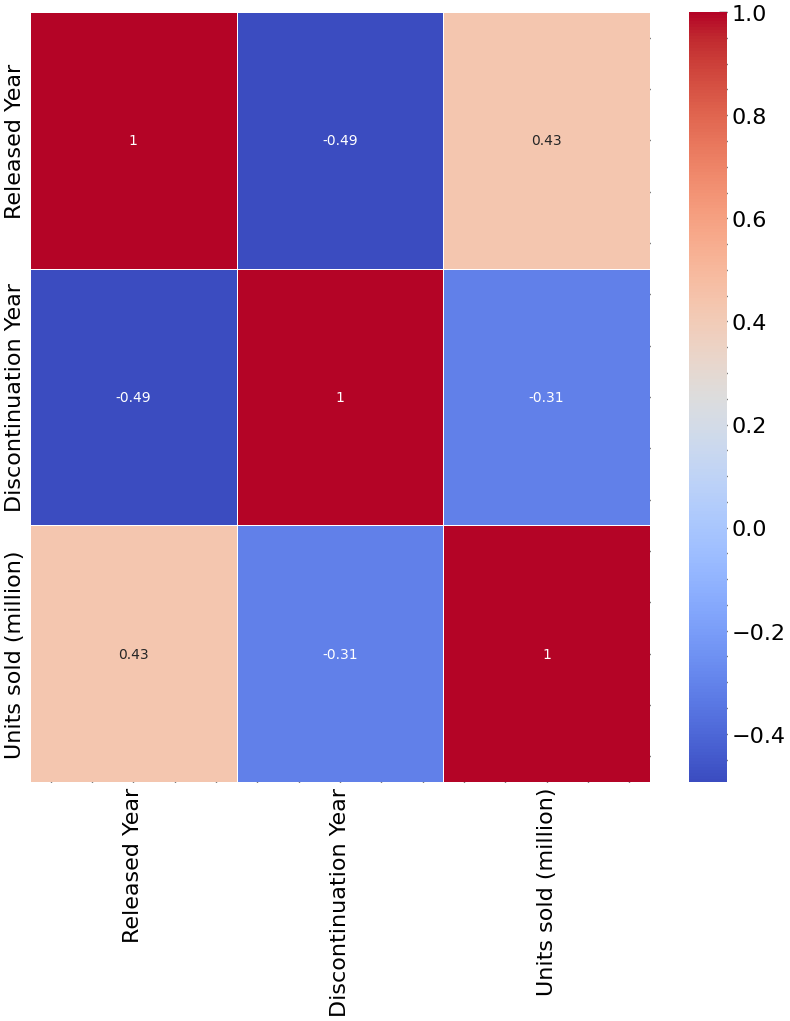

In [147]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

In [148]:
#filtro para consolas de sony
df_sony=df_con[df_con["Company"]=='Sony']
df_sony

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million
5,PlayStation 4,Home,Sony,2013,0,117.20,NaN
6,PlayStation,Home,Sony,1994,2006,102.49,NaN
8,PlayStation 3,Home,Sony,2006,2017,87.40,Final sales are greater than 87.4 million
11,PlayStation Portable,Handheld,Sony,2004,2014,82.00,Estimated between 80-82 million
19,PlayStation 5,Home,Sony,2020,0,61.70,NaN
25,PlayStation Vita,Handheld,Sony,2011,2019,15.00,Estimated between 10-15 million


In [149]:
print(f"La cantidad de consolas vendidas por Sony son: {round(df_sony["Units sold (million)"].sum(),2)} millones")

La cantidad de consolas vendidas por Sony son: 620.79 millones


## _Grafico de ventas de consolas de Sony_

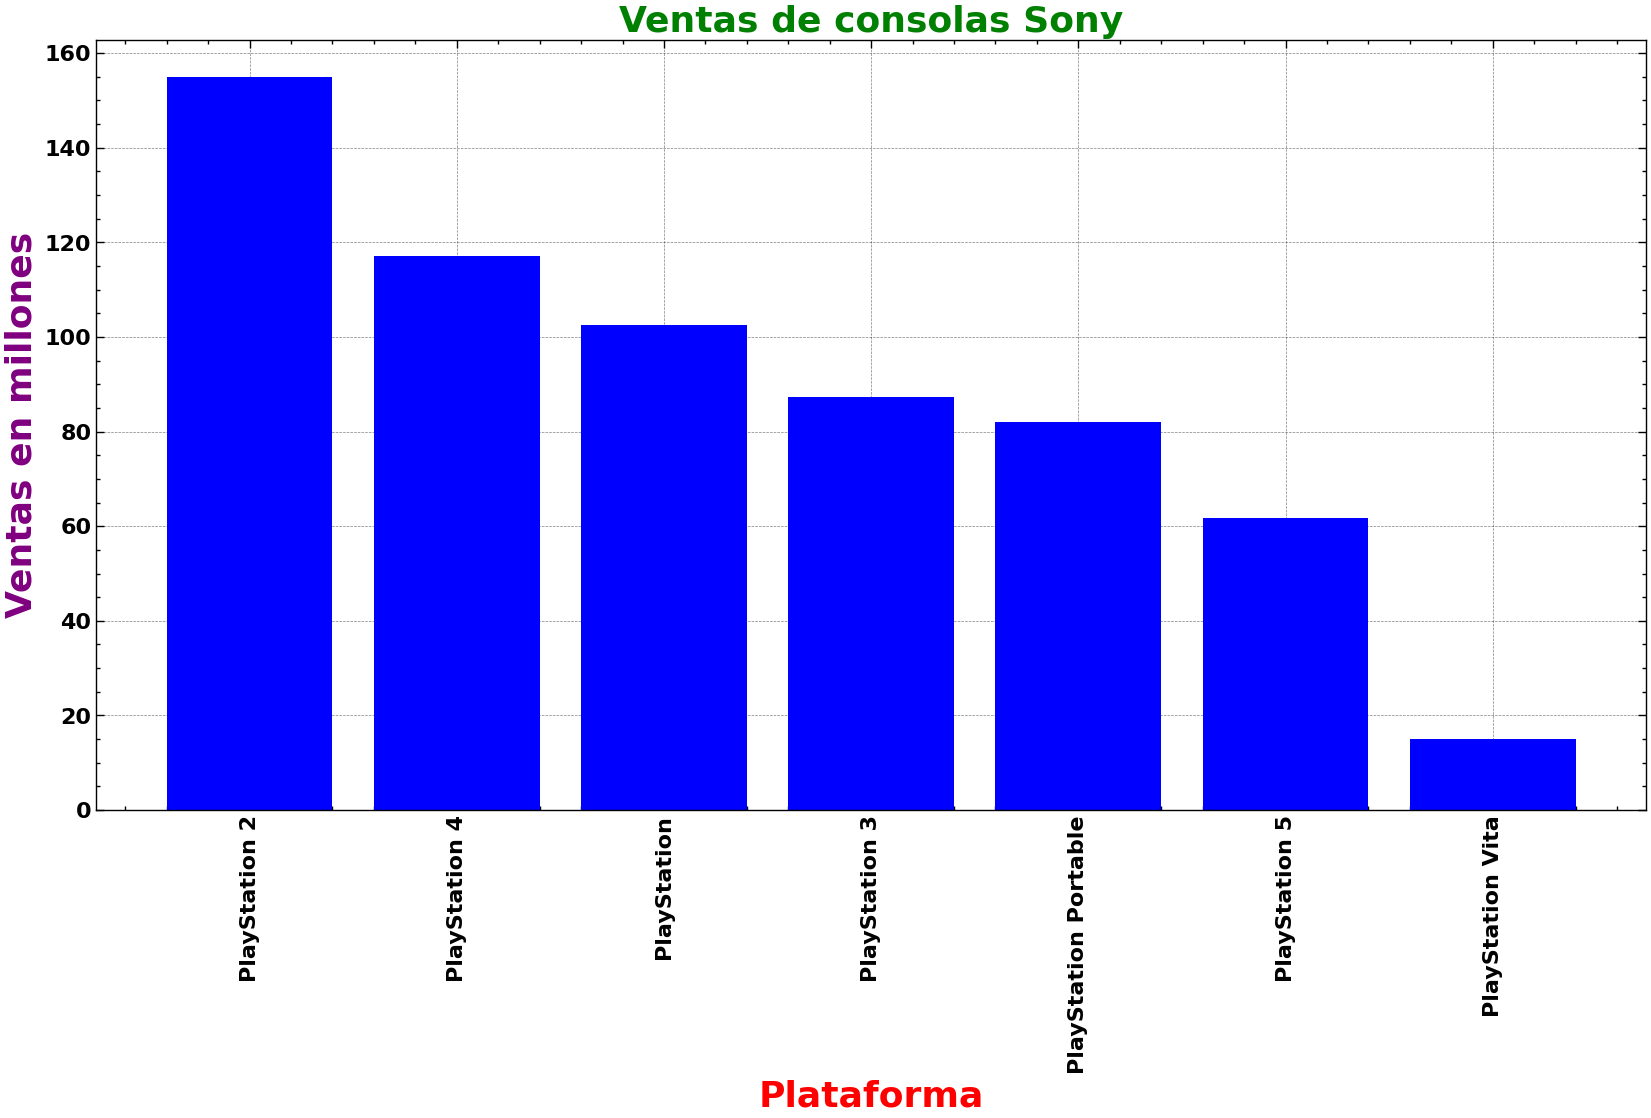

In [150]:
plt.figure(figsize=(20,10))
plt.bar(df_sony["Console Name"], df_sony["Units sold (million)"], color='b')
plt.xticks(ticks=df_sony["Console Name"], rotation=90, color='black', fontweight='bold')
plt.yticks(color='black', fontweight='bold')
plt.xlabel('Plataforma', color='r', fontsize=26, fontweight='bold')
plt.ylabel("Ventas en millones", color='purple',fontsize=26, fontweight='bold')
plt.title("Ventas de consolas Sony", color='g',fontsize=26, fontweight='bold')
plt.show()

In [151]:
#filtro para consolas de Nintendo   
df_N=df_con[df_con["Company"]=='Nintendo']
df_N

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN
7,Wii,Home,Nintendo,2006,2013,101.63,NaN
10,Game Boy Advance,Handheld,Nintendo,2001,2010,81.51,NaN
12,Nintendo 3DS,Handheld,Nintendo,2011,2020,75.94,NaN
13,NES/Famicom,Home,Nintendo,1983,2003,61.91,NaN
15,SNES/Super Famicom,Home,Nintendo,1990,2003,49.10,NaN
16,Game & Watch,Handheld,Nintendo,1980,1991,43.40,NaN


In [152]:
print(f" El total de consolas vendidas por Nintendo son: {df_N["Units sold (million)"].sum()} millones")

 El total de consolas vendidas por Nintendo son: 883.11 millones


## _Gráfico de ventas de consolas de Nintendo, donde la más vendida es la Nintendo DS_

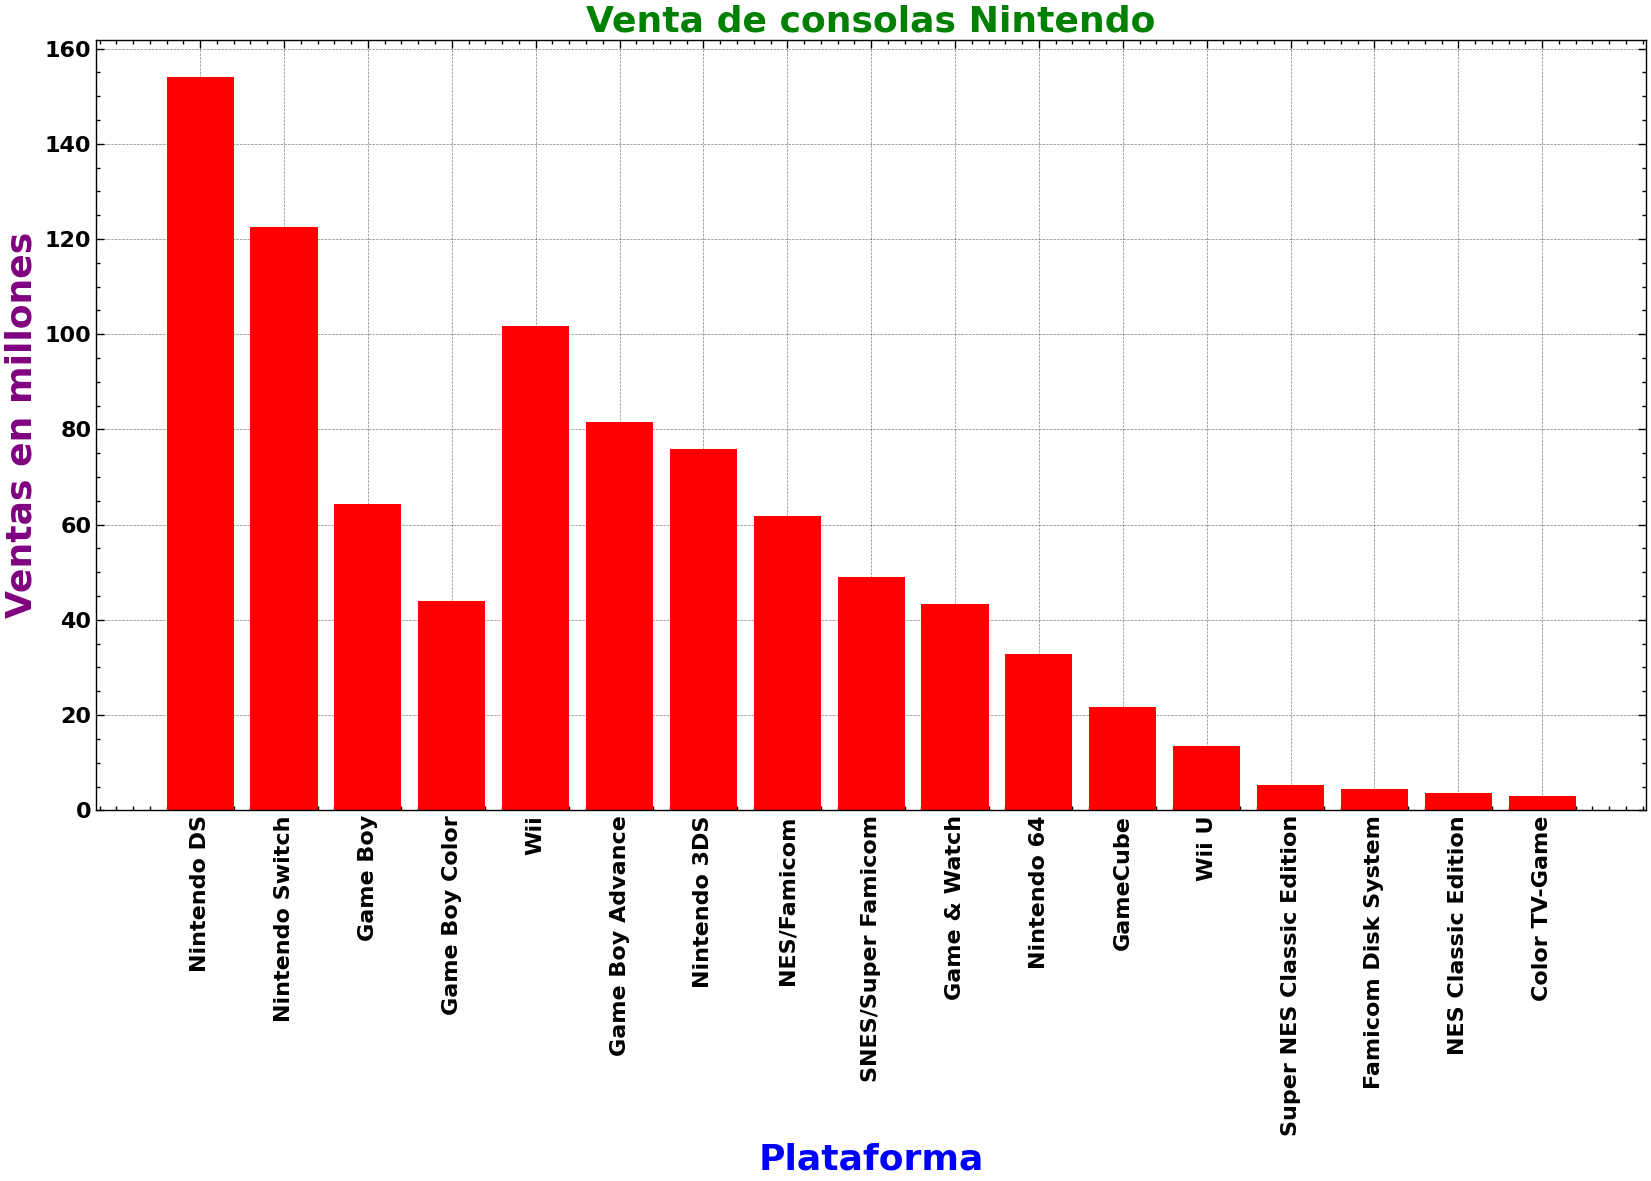

In [153]:
plt.figure(figsize=(20,10))
plt.bar(df_N["Console Name"], df_N["Units sold (million)"], color='r')
plt.xticks(ticks=df_N["Console Name"], rotation=90, color='black', fontweight='bold')
plt.yticks(color='black', fontweight='bold')
plt.xlabel('Plataforma', color='b', fontsize=26, fontweight='bold')
plt.ylabel("Ventas en millones", color='purple',fontsize=26, fontweight='bold')
plt.title("Venta de consolas Nintendo", color='g',fontsize=26, fontweight='bold')
plt.show()

In [ ]:
#filtro para consolas de Microsoft
df_m=df_con[df_con["Company"]=='Microsoft']
df_m

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
9,Xbox 360,Home,Microsoft,2005,2016,84.0,Final sales are greater than 84 million
14,Xbox One,Home,Microsoft,2013,2020,58.5,Estimated between 51-58.5 million
21,Xbox,Home,Microsoft,2001,2009,24.0,NaN
23,Xbox Series X/S,Home,Microsoft,2020,0,30.0,Approximately around 30 million


In [171]:
print(f"La venta total de consolas vendidas por Microsoft son: {df_m["Units sold (million)"].sum()} millones")

La venta total de consolas vendidas por Microsoft son: 196.5 millones


## _Gráfico de ventas de consolas de Microsoft, la más vendida es XBOX 360_

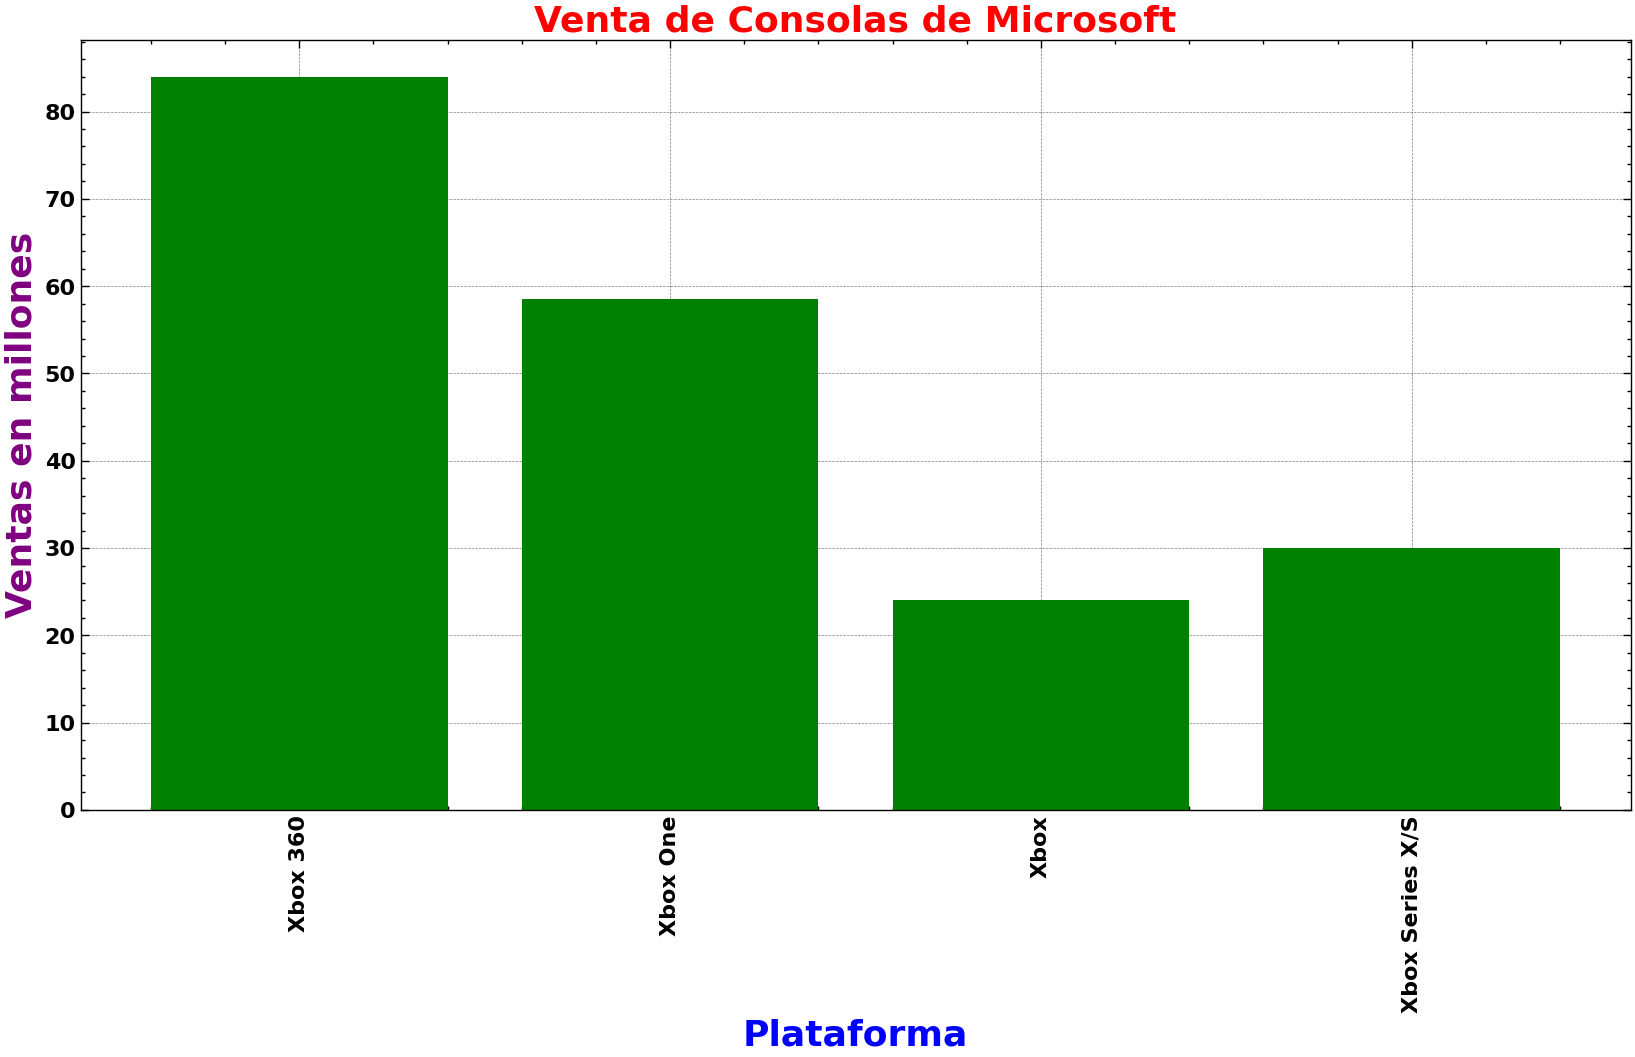

In [156]:
plt.figure(figsize=(20,10))
plt.bar(df_m["Console Name"], df_m["Units sold (million)"], color='g')
plt.xticks(ticks=df_m["Console Name"], rotation=90, color='black', fontweight='bold')
plt.yticks(color='black', fontweight='bold')
plt.xlabel('Plataforma', color='b', fontsize=26, fontweight='bold')
plt.ylabel("Ventas en millones", color='purple',fontsize=26, fontweight='bold')
plt.title("Venta de Consolas de Microsoft", color='r',fontsize=26, fontweight='bold')
plt.show()

In [157]:
ps5=df_con[df_con["Console Name"]=='PlayStation 5']
ps5

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
19,PlayStation 5,Home,Sony,2020,0,61.7,NaN


In [158]:
Xseries=df_con[df_con["Console Name"]=='Xbox Series X/S']
Xseries

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
23,Xbox Series X/S,Home,Microsoft,2020,0,30.0,Approximately around 30 million


## _Predicción de Ventas de las consolas de 9na generación_

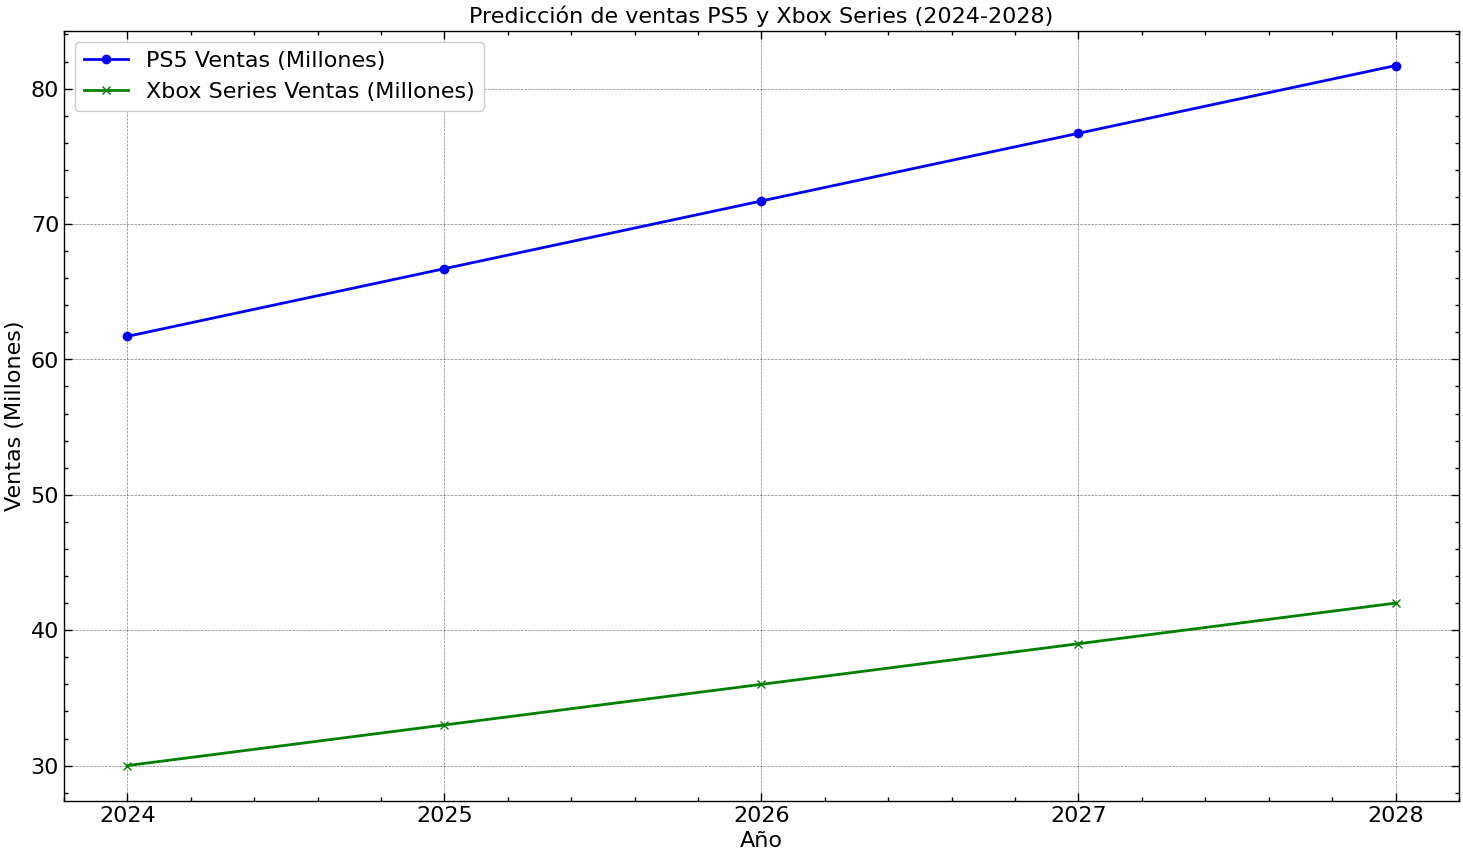

In [ ]:
# Datos de ventas actuales (año 2024)
years = np.array([2024]).reshape(-1, 1)  # Año actual
sales_ps5 = np.array(ps5["Units sold (million)"])  # Ventas actuales en millones
sales_xbox = np.array([Xseries["Units sold (million)"]])  # Ventas actuales en millones

# Asumimos una tasa de crecimiento lineal (puedes ajustarla según proyecciones)
growth_rate_ps5 = 5  # Crecimiento anual estimado para PS5 (en millones)
growth_rate_xbox = 3  # Crecimiento anual estimado para Xbox (en millones)

# Generar predicción para los años 2024-2028
future_years = np.arange(2024, 2029)

# Predicciones de ventas lineales
pred_ps5 = sales_ps5[-1] + growth_rate_ps5 * (future_years - 2024)
pred_xbox = sales_xbox[-1] + growth_rate_xbox * (future_years - 2024)

# Graficar
plt.figure(figsize=(18,10))
plt.plot(future_years, pred_ps5, label='PS5 Ventas (Millones)', marker='o', color='b')
plt.plot(future_years, pred_xbox, label='Xbox Series Ventas (Millones)', marker='x', color='g')
plt.title('Predicción de ventas PS5 y Xbox Series (2024-2028)')
plt.xlabel('Año')
plt.ylabel('Ventas (Millones)')
plt.xticks(future_years)
plt.legend()
plt.show()


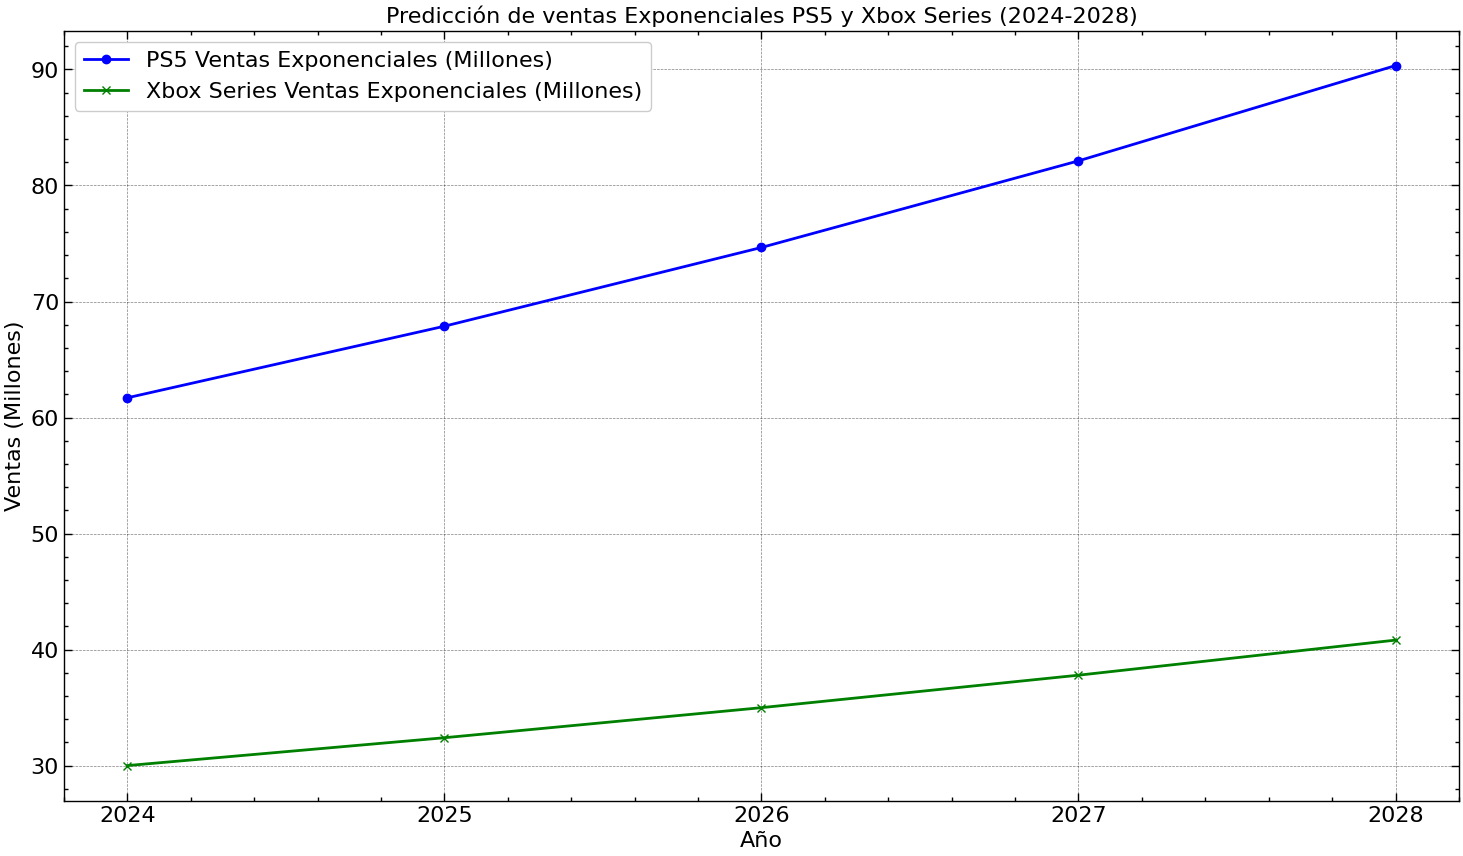

In [160]:
# Asumimos una tasa de crecimiento exponencial (puedes ajustarla según proyecciones)
growth_rate_ps5_exp = 1.1  # 10% de crecimiento anual para PS5
growth_rate_xbox_exp = 1.08  # 8% de crecimiento anual para Xbox

# Predicciones de ventas exponenciales
pred_ps5_exp = sales_ps5[-1] * growth_rate_ps5_exp ** (future_years - 2024)
pred_xbox_exp = sales_xbox[-1] * growth_rate_xbox_exp ** (future_years - 2024)

# Graficar
plt.figure(figsize=(18,10))
plt.plot(future_years, pred_ps5_exp, label='PS5 Ventas Exponenciales (Millones)', marker='o',color='b')
plt.plot(future_years, pred_xbox_exp, label='Xbox Series Ventas Exponenciales (Millones)', marker='x',color='g')
plt.title('Predicción de ventas Exponenciales PS5 y Xbox Series (2024-2028)')
plt.xlabel('Año')
plt.ylabel('Ventas (Millones)')
plt.xticks(future_years)
plt.legend()
plt.show()


# **Machine Learning**

In [161]:
# Aplicar One-Hot Encoding a columnas categóricas
df_encoded = pd.get_dummies(df_con, columns=['Type', 'Company', 'Remarks'], drop_first=True)


In [163]:
# Selección de características y variable objetivo
X = df_encoded[['Released Year', 'Discontinuation Year']]  # Ajusta según tu objetivo
y = df_encoded['Units sold (million)']  # Cambia 'Type' por la columna objetivo adecuada

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
# Modelo de Regresión
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Evaluar el modelo
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 597.0747406954541


In [165]:
# Convertir 'Units sold (million)' en categorías (binarización simple)
df_con['Units sold Category'] = pd.cut(df_con['Units sold (million)'], 
                                       bins=[0, 50, 100, 200], 
                                       labels=['Bajo', 'Medio', 'Alto'])

# Usar esta columna como variable objetivo
y = df_con['Units sold Category']


In [166]:
# Selección de características
X = df_con[['Released Year', 'Discontinuation Year']]
y = df_con['Units sold Category']  # Variable categórica

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de clasificación
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predicción y evaluación
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Bajo       0.78      0.88      0.82         8
       Medio       0.50      0.33      0.40         3

    accuracy                           0.73        11
   macro avg       0.64      0.60      0.61        11
weighted avg       0.70      0.73      0.71        11



In [167]:
# Selección de características
X = df_con[['Released Year', 'Discontinuation Year']]
y = df_con['Units sold (million)']  # Variable continua

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predicción y evaluación
y_pred = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 597.0747406954541


              precision    recall  f1-score   support

        Bajo       0.78      0.88      0.82         8
       Medio       0.50      0.33      0.40         3

    accuracy                           0.73        11
   macro avg       0.64      0.60      0.61        11
weighted avg       0.70      0.73      0.71        11



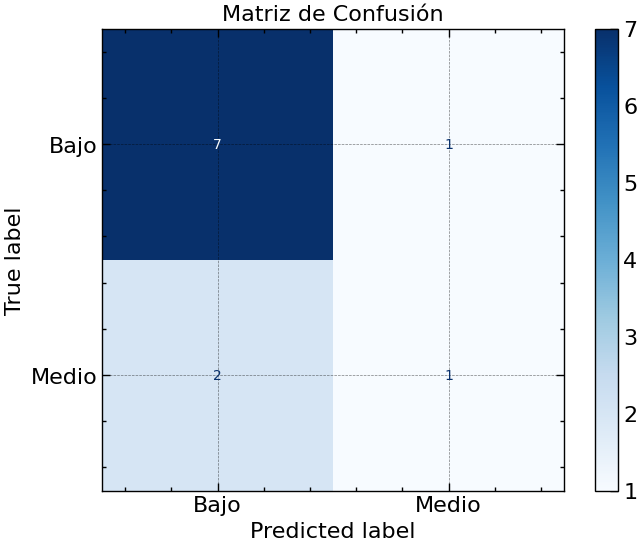

In [168]:
# Definir variables
X = df_con[['Released Year', 'Discontinuation Year']]
y = df_con['Units sold Category']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predicción
y_pred = classifier.predict(X_test)

# Reporte de Clasificación
print(classification_report(y_test, y_pred))

# Matriz de Confusión
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()


In [169]:
# Definir variables
X = df_con[['Released Year', 'Discontinuation Year']]
y = df_con['Units sold (million)']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predicción
y_pred = regressor.predict(X_test)

# Evaluación
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 597.0747406954541


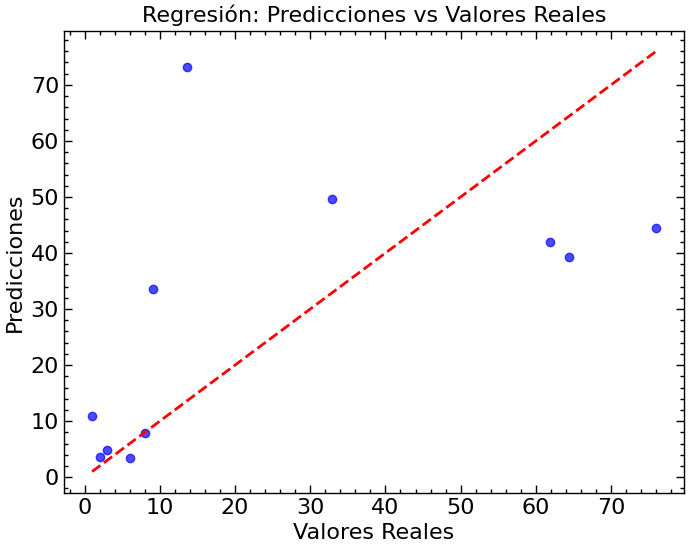

In [170]:
# Gráfica de predicciones vs reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión: Predicciones vs Valores Reales")
plt.grid()
plt.show()
